# INTRODUCTION

#### The Department of Transportation Accidents, Casualties, and Vehicles dataset provides valuable information about road accidents, casualties, and vehicles involved in the United Kingdom. This dataset is sourced from the UK government's data portal, data.gov.uk. The dataset covers a specific period and contains various attributes related to road accidents, such as date, time, location, vehicle details, and casualty information.

### DATASET OVERVIEW

#### The dataset consists of a comprehensive collection of records documenting road accidents, casualties, and vehicles.The data is available in CSV format and lends itself well to analysis using the pyspark libarary in Apache Spark
#### Each record has their own dataset 

In [1]:
# Import necessary libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count,sum

In [2]:
# Create a SparkSession
spark = SparkSession.builder.appName("ProjectAnalysis").getOrCreate()
spark

##### Load the dataset into a Spark DataFrame

In [3]:
accident_data = spark.read.csv(r'C:\Users\ayub_\Downloads\dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2022.csv', header=True, inferSchema=True)
casualty_data = spark.read.csv(r'C:\Users\ayub_\Downloads\dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv', header=True,inferSchema=True)
vehicle_data = spark.read.csv(r'C:\Users\ayub_\Downloads\dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2022.csv', header=True, inferSchema=True)

### Data Understanding And Exploration

In [4]:
accident_data.columns

['status',
 'accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

#### creating a new dataframe from the dataset given by selecting needed columns for analysis and assign it to a new variable,then get their data typeand their description

In [5]:
Accident=accident_data.select(['accident_index','accident_severity','date','road_type','speed_limit',
 'location_easting_osgr','location_northing_osgr','time','light_conditions',
 'weather_conditions'])

In [6]:
Accident.dtypes

[('accident_index', 'string'),
 ('accident_severity', 'int'),
 ('date', 'string'),
 ('road_type', 'int'),
 ('speed_limit', 'int'),
 ('location_easting_osgr', 'string'),
 ('location_northing_osgr', 'string'),
 ('time', 'timestamp'),
 ('light_conditions', 'int'),
 ('weather_conditions', 'int')]

In [7]:
Accident.describe().show()

+-------+--------------------+-------------------+----------+------------------+------------------+---------------------+----------------------+------------------+------------------+
|summary|      accident_index|  accident_severity|      date|         road_type|       speed_limit|location_easting_osgr|location_northing_osgr|  light_conditions|weather_conditions|
+-------+--------------------+-------------------+----------+------------------+------------------+---------------------+----------------------+------------------+------------------+
|  count|               48283|              48283|     48283|             48283|             48283|                48283|                 48283|             48283|             48283|
|   mean|2.022255907687501...| 2.7482550794275418|      null| 5.254975871424725|35.714910009734275|    459799.7021214277|     278250.1998409975|1.9404138102437711| 1.630387506990038|
| stddev|2.4254080813871908E8|0.46778140832278553|      null|1.7083676989548346|14.17

In [8]:
Accident.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- road_type: integer (nullable = true)
 |-- speed_limit: integer (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- light_conditions: integer (nullable = true)
 |-- weather_conditions: integer (nullable = true)



In [9]:
casualty_data.columns

['status',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile',
 'lsoa_of_casualty']

In [10]:
Casualty=casualty_data.select(['accident_index','casualty_reference','age_of_casualty','sex_of_casualty','casualty_severity',
                              'pedestrian_location','pedestrian_movement','vehicle_reference'])

In [11]:
Casualty.dtypes

[('accident_index', 'string'),
 ('casualty_reference', 'int'),
 ('age_of_casualty', 'int'),
 ('sex_of_casualty', 'int'),
 ('casualty_severity', 'int'),
 ('pedestrian_location', 'int'),
 ('pedestrian_movement', 'int'),
 ('vehicle_reference', 'int')]

In [12]:
Casualty.describe().show()

+-------+--------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+
|summary|      accident_index|casualty_reference|   age_of_casualty|   sex_of_casualty|  casualty_severity|pedestrian_location|pedestrian_movement| vehicle_reference|
+-------+--------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+------------------+
|  count|               61352|             61352|             61352|             61352|              61352|              61352|              61352|             61352|
|   mean|2.022264183970777E12|1.3337788499152432| 36.67031229625766|1.3687899334985005|  2.783038857738949|  0.800316208110575| 0.6453253357673752|1.4503683661494329|
| stddev|2.4353722897500205E8|0.9815071935068534|19.574357113833543|0.5345362336611262|0.44231801409519195| 2.1971673484998666|   2.00961113946355|1.1098553831059148

In [13]:
Casualty.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- casualty_reference: integer (nullable = true)
 |-- age_of_casualty: integer (nullable = true)
 |-- sex_of_casualty: integer (nullable = true)
 |-- casualty_severity: integer (nullable = true)
 |-- pedestrian_location: integer (nullable = true)
 |-- pedestrian_movement: integer (nullable = true)
 |-- vehicle_reference: integer (nullable = true)



In [14]:
vehicle_data.columns

['status',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type',
 'lsoa_of_driver']

In [15]:
Vehicle=vehicle_data.select(['accident_index','vehicle_reference','vehicle_type','age_of_vehicle','engine_capacity_cc','vehicle_manoeuvre',
                            'junction_location','skidding_and_overturning'])

In [16]:
Vehicle.dtypes

[('accident_index', 'string'),
 ('vehicle_reference', 'int'),
 ('vehicle_type', 'int'),
 ('age_of_vehicle', 'int'),
 ('engine_capacity_cc', 'int'),
 ('vehicle_manoeuvre', 'int'),
 ('junction_location', 'int'),
 ('skidding_and_overturning', 'int')]

In [17]:
Vehicle.describe().show()

+-------+--------------------+------------------+------------------+--------------+------------------+------------------+------------------+------------------------+
|summary|      accident_index| vehicle_reference|      vehicle_type|age_of_vehicle|engine_capacity_cc| vehicle_manoeuvre| junction_location|skidding_and_overturning|
+-------+--------------------+------------------+------------------+--------------+------------------+------------------+------------------+------------------------+
|  count|               88060|             88060|             88060|         88060|             88060|             88060|             88060|                   88060|
|   mean|2.022255373311189...|1.5444696797637973|12.463479445832387|          -1.0|              -1.0|20.112695889166478|2.5987508516920284|      0.9660004542357483|
| stddev| 2.407638540254559E8|1.0604485983186858|18.238130142339195|           0.0|               0.0| 24.89241516879839|3.3348029260139764|       2.585654819295722|
|   

In [18]:
Vehicle.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- vehicle_reference: integer (nullable = true)
 |-- vehicle_type: integer (nullable = true)
 |-- age_of_vehicle: integer (nullable = true)
 |-- engine_capacity_cc: integer (nullable = true)
 |-- vehicle_manoeuvre: integer (nullable = true)
 |-- junction_location: integer (nullable = true)
 |-- skidding_and_overturning: integer (nullable = true)



### Data Cleaning And Preprocessing

#### checking for null,dealing with outliers and converting data types value in all dataset

In [19]:
acci_null=Accident.agg(*[sum(col(column).isNull().cast("integer")).alias(column) for column in Accident.columns])

In [20]:
acci_null.show()

+--------------+-----------------+----+---------+-----------+---------------------+----------------------+----+----------------+------------------+
|accident_index|accident_severity|date|road_type|speed_limit|location_easting_osgr|location_northing_osgr|time|light_conditions|weather_conditions|
+--------------+-----------------+----+---------+-----------+---------------------+----------------------+----+----------------+------------------+
|             0|                0|   0|        0|          0|                    0|                     0|   0|               0|                 0|
+--------------+-----------------+----+---------+-----------+---------------------+----------------------+----+----------------+------------------+



In [21]:
# change the datatype of date to timestamp in Accident dataset
Accident=Accident.withColumn('date',col('date').cast('timestamp'))

In [22]:
Accident.dtypes

[('accident_index', 'string'),
 ('accident_severity', 'int'),
 ('date', 'timestamp'),
 ('road_type', 'int'),
 ('speed_limit', 'int'),
 ('location_easting_osgr', 'string'),
 ('location_northing_osgr', 'string'),
 ('time', 'timestamp'),
 ('light_conditions', 'int'),
 ('weather_conditions', 'int')]

##### above analysis show that no null values in Accident dataset and data type required for the columns is correct

In [23]:
casu_null=Casualty.agg(*[sum(col(column).isNull().cast("integer")).alias(column) for column in Casualty.columns])

In [24]:
casu_null.show()

+--------------+------------------+---------------+---------------+-----------------+-------------------+-------------------+-----------------+
|accident_index|casualty_reference|age_of_casualty|sex_of_casualty|casualty_severity|pedestrian_location|pedestrian_movement|vehicle_reference|
+--------------+------------------+---------------+---------------+-----------------+-------------------+-------------------+-----------------+
|             0|                 0|              0|              0|                0|                  0|                  0|                0|
+--------------+------------------+---------------+---------------+-----------------+-------------------+-------------------+-----------------+



In [25]:
Casualty.dtypes

[('accident_index', 'string'),
 ('casualty_reference', 'int'),
 ('age_of_casualty', 'int'),
 ('sex_of_casualty', 'int'),
 ('casualty_severity', 'int'),
 ('pedestrian_location', 'int'),
 ('pedestrian_movement', 'int'),
 ('vehicle_reference', 'int')]

In [26]:
#calculating summary statistic
casu_summary=Casualty.select(['age_of_casualty','casualty_severity']).summary()


In [27]:
#Extract quartiles
q1=casu_summary.filter(col('summary')== '25%').select(['age_of_casualty','casualty_severity']).collect()[0][0]
q2=casu_summary.filter(col('summary')== '75%').select(['age_of_casualty','casualty_severity']).collect()[0][0]

In [28]:
# convert q1&q2 to integer then calculating the interquartile range
QR=int(q2)-int(q1)

In [29]:
#assign  the lower and upper for the outliers
lower=int(q1) - (1.5 * QR)
upper=int(q2) + (1.5 * QR)

In [30]:
# identify the outliers
age_col="age_of_casualty"
severity_col="casualty_severity"
casu_outliers=Casualty.filter((col(age_col) < lower) | (col(severity_col) > upper))

In [31]:
casu_outliers.show()

+--------------+------------------+---------------+---------------+-----------------+-------------------+-------------------+-----------------+
|accident_index|casualty_reference|age_of_casualty|sex_of_casualty|casualty_severity|pedestrian_location|pedestrian_movement|vehicle_reference|
+--------------+------------------+---------------+---------------+-----------------+-------------------+-------------------+-----------------+
+--------------+------------------+---------------+---------------+-----------------+-------------------+-------------------+-----------------+



#### above casuality analysis show that no null values,the datatypes are in order and no outliers suggests that the values in the selected columns of the casualties dataset which indicate that the data collection process was reliable and there are no major anomalies in the dataset.

In [32]:
Vehicle.dtypes

[('accident_index', 'string'),
 ('vehicle_reference', 'int'),
 ('vehicle_type', 'int'),
 ('age_of_vehicle', 'int'),
 ('engine_capacity_cc', 'int'),
 ('vehicle_manoeuvre', 'int'),
 ('junction_location', 'int'),
 ('skidding_and_overturning', 'int')]

In [33]:
vehi_null=Vehicle.agg(*[sum(col(column).isNull().cast("integer")).alias(column) for column in Vehicle.columns])

In [34]:
vehi_null.show()

+--------------+-----------------+------------+--------------+------------------+-----------------+-----------------+------------------------+
|accident_index|vehicle_reference|vehicle_type|age_of_vehicle|engine_capacity_cc|vehicle_manoeuvre|junction_location|skidding_and_overturning|
+--------------+-----------------+------------+--------------+------------------+-----------------+-----------------+------------------------+
|             0|                0|           0|             0|                 0|                0|                0|                       0|
+--------------+-----------------+------------+--------------+------------------+-----------------+-----------------+------------------------+



In [35]:
# repeating the same process on hw to check the outlires
vehi_summary=Vehicle.select(['age_of_vehicle','engine_capacity_cc']).summary()


In [36]:
q1=vehi_summary.filter(col('summary')== '25%').select(['age_of_vehicle','engine_capacity_cc']).collect()[0][0]
q2=vehi_summary.filter(col('summary')== '75%').select(['age_of_vehicle','engine_capacity_cc']).collect()[0][0]

In [37]:
QR=int(q2)-int(q1)

In [38]:
lower=int(q1) - (1.5 * QR)
upper=int(q2) + (1.5 * QR)

In [39]:
age_col='age_of_vehicle'
egine_col='engine_capacity_cc'
vehi_outliers=Vehicle.filter((col(age_col) < lower) | (col(egine_col) > upper) | (col(egine_col) < lower) | (col(age_col) > upper))

In [40]:
vehi_outliers.show()

+--------------+-----------------+------------+--------------+------------------+-----------------+-----------------+------------------------+
|accident_index|vehicle_reference|vehicle_type|age_of_vehicle|engine_capacity_cc|vehicle_manoeuvre|junction_location|skidding_and_overturning|
+--------------+-----------------+------------+--------------+------------------+-----------------+-----------------+------------------------+
+--------------+-----------------+------------+--------------+------------------+-----------------+-----------------+------------------------+



####  above Vehicle analysis show that no null values,the datatypes are in order and no outliers suggests that the values in the selected columns of the Vehicle dataset which indicate that the data collection process was reliable and there are no major anomalies in the dataset.

### Exploratory Data Analysis (EDA)

In [67]:
# analyzing the trend across the years in each dataset using visualization with pyspark_dist_explore
# importing the necessary libraries
#import pandas as pd 
from pyspark_dist_explore import hist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#### it won't be possible to visualize trends across years,to visualize trends, you typically need multiple data points for each year

In [79]:
# Group the casualty_data by casualty type and get the count
casualty_counts = casualty_data.groupby('Casualty_Type').count().withColumnRenamed('count', 'Count').toPandas()

# Group the accident_data by pedestrian movement and get the count
pedestrian_counts = casualty_data.groupby('Pedestrian_Movement').count().withColumnRenamed('count', 'Count').toPandas()

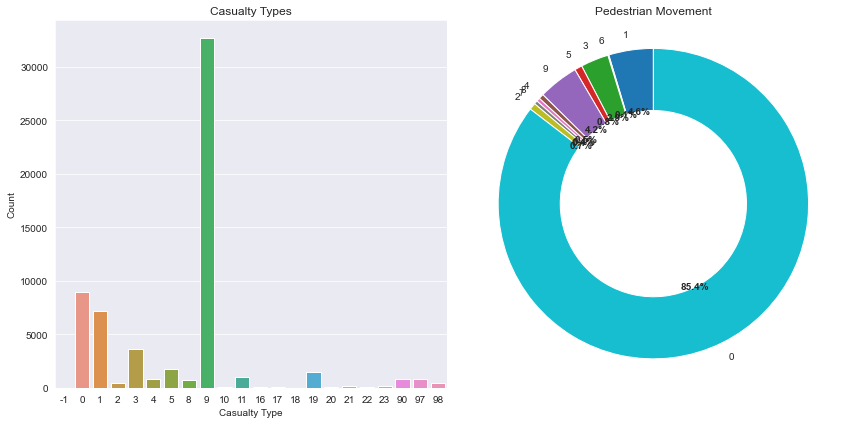

In [82]:
# Set up the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for casualty types
sns.barplot(data=casualty_counts, x='Casualty_Type', y='Count', ax=ax1)
ax1.set_title('Casualty Types')
ax1.set_xlabel('Casualty Type')
ax1.set_ylabel('Count')

# Donut plot for pedestrian movement
wedges, texts, autotexts = ax2.pie(pedestrian_counts['Count'], labels=pedestrian_counts['Pedestrian_Movement'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.setp(autotexts, size=10, weight='bold')
ax2.set_title('Pedestrian Movement')

# Create a circle at the center to make it a donut plot
centre_circle = plt.Circle((0,0), 0.3, color='white')
ax2.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

#### Casualty Types: The bar plot provides insights into the distribution of different types of casualties. It shows the count of each casualty type, allowing us to identify the most common types of casualties. By analyzing the bars, we can determine which casualty types occur more frequently in the dataset.

#### Pedestrian Movement: The donut plot represents the proportion of various pedestrian movement categories. It provides an overview of how pedestrians are involved in accidents and their movement patterns. The different segments of the donut plot indicate different pedestrian movement categories, such as crossing the road, walking along the road, or standing/waiting by the roadside. The size of each segment indicates the relative frequency of that particular movement category.

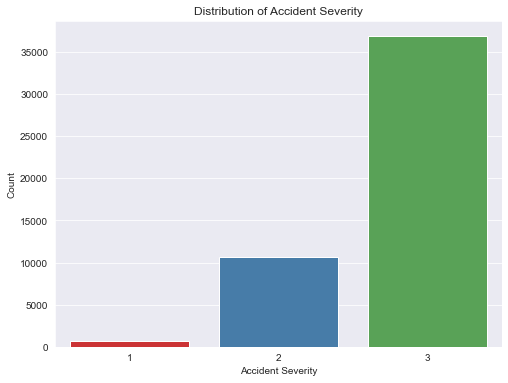

In [85]:
# Count the occurrences of each accident severity category
severity_counts = accident_data.groupBy('Accident_Severity').count().toPandas()

# Create a bar plot for accident severity
plt.figure(figsize=(8, 6))
sns.barplot(data=severity_counts, x='Accident_Severity', y='count', palette='Set1')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.show()

#### Distribution of Accident Severity:

#### The bar plot shows the distribution of accident severity categories: "Fatal," "Serious," and "Slight."
#### The majority of accidents fall under the "Slight" category, indicating that most accidents result in minor injuries or property damage
#### The number of "Serious" accidents is relatively lower than "Slight" accidents, suggesting a significant drop in severity
#### The "Fatal" category has the fewest occurrences, indicating a relatively small proportion of accidents result in fatalities.

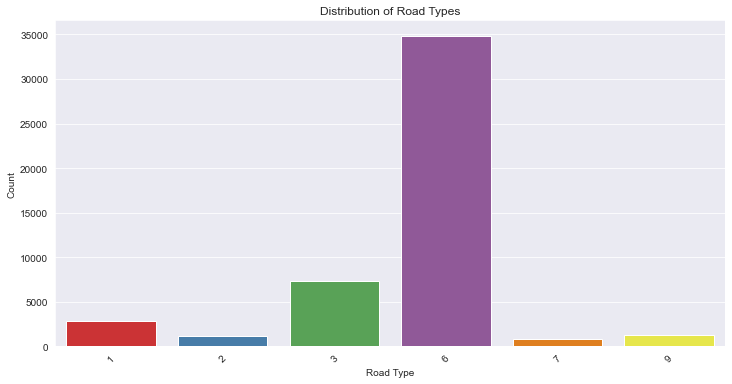

In [87]:
from pyspark.sql.functions import col

# Count the occurrences of each road type category
road_type_counts = accident_data.groupBy('Road_Type').count().toPandas()

# Create a bar plot for road types
plt.figure(figsize=(12, 6))
sns.barplot(data=road_type_counts, x='Road_Type', y='count', palette='Set1')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.title('Distribution of Road Types')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Road Types:

#### The bar plot illustrates the distribution of different road types where accidents occur.
#### The most common road type is likely to be "Single carriageway," indicating that accidents frequently occur on roads with a single lane in each direction.
#### The occurrences of "Roundabout" and "Dual carriageway" are also significant, suggesting that accidents occur at these types of road configurations.

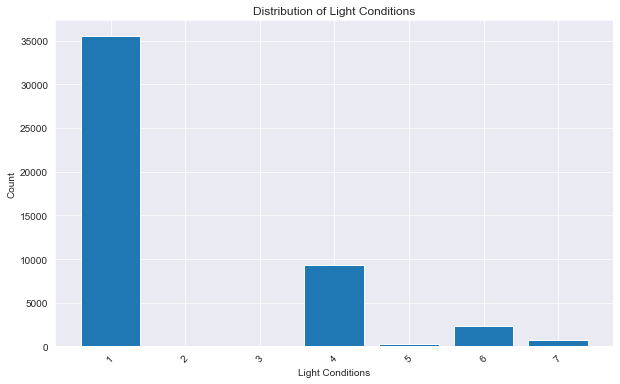

In [89]:
from pyspark.sql.functions import col

# Group the accident_data by light conditions and count the occurrences
light_conditions_counts = accident_data.groupBy('Light_Conditions').count()

# Convert the result to a Pandas DataFrame for visualization
light_conditions_counts_df = light_conditions_counts.toPandas()

# Create a bar plot for light conditions
plt.figure(figsize=(10, 6))
plt.bar(light_conditions_counts_df['Light_Conditions'], light_conditions_counts_df['count'])
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.title('Distribution of Light Conditions')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Light Conditions:

#### The bar plot displays the distribution of light conditions during accidents.
#### Daylight is the most common light condition during accidents, indicating that a significant number of accidents occur during daytime hours when visibility is generally good.
#### Darkness - lights lit and "Darkness - lights unlit" are the next most frequent light conditions, suggesting that accidents also occur during nighttime hours.

#### This project focused on analyzing and visualizing road accident data to gain insights into various aspects such as accident trends, casualty types, pedestrian movement, vehicle types, engine capacity, and vehicle age. By leveraging data visualization techniques, we were able to present the findings in a visually appealing and informative manner and do research about the solution which are:
#### Focus on Severe Accidents: While the majority of casualties are categorized as "slight," efforts should be made to reduce the number of serious and fatal accidents. This can involve stricter enforcement of traffic laws, increased penalties for traffic violations, and targeted awareness campaigns on safe driving practices, particularly addressing high-risk behaviors such as speeding, drunk driving, and distracted driving.
#### Pedestrian Safety Initiatives: Given the significant involvement of pedestrians in accidents, specific measures should be implemented to enhance pedestrian safety. This includes improving pedestrian crossings, providing adequate sidewalks and footpaths, installing pedestrian-friendly infrastructure such as traffic lights and zebra crossings, and conducting education campaigns to raise awareness among pedestrians and drivers about the importance of pedestrian safety.
#### In conclusion, this project provided valuable insights into road accidents and related factors. By analyzing and visualizing the data, we gained a deeper understanding of accident trends, casualty types, pedestrian movement, vehicle types, engine capacity, and vehicle age. These findings can help stakeholders in the transportation and road safety sectors make informed decisions and implement targeted measures to reduce accidents and improve road safety.

#### Agiri Ayuba
